In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Ridge:

    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4, batch_size=64, random_state=42, l2_regularization=0, verbose=False) -> None:

        np.random.seed(random_state)
        
        self.m, self.n = None, None
        self.verbose = verbose
        self.lr = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.l2 = l2_regularization
        self.loss = np.zeros(shape = (self.max_iter, ))
    

    def predict(self, X):
        
        if self.m is None:

            self.m = X.shape[0]
        
        X = np.hstack((np.ones((self.m, 1)), X))
        return np.dot(X, self.coefs_)
    

    def batch_generator(self, X, y, batch_size):

        indices = np.arange(self.m)
        np.random.shuffle(indices)

        for start in np.arange(0, self.m, batch_size):

            end = min(start + batch_size, self.m)
            yield X[start : end], y[start : end]
    

    def fit(self, X, y):

        self.m, self.n = X.shape
        X = np.hstack((np.ones((self.m, 1)), X))

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, ))
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, 1))
        

        for e in np.arange(self.max_iter):

            total_loss = 0

            for x_batch, y_batch in self.batch_generator(X, y, self.batch_size):

                pred = np.dot(x_batch, self.coefs_)
                loss = np.mean(np.square(y_batch - pred)) + self.l2 * np.sum(np.square(self.coefs_[1:]))
                total_loss += loss

                self.coefs_ -= self.lr * (-2 / len(x_batch)) * np.dot(x_batch.T, y_batch - pred)  + 2 * self.l2 * np.hstack(([0], self.coefs_[1:]))
            
            self.loss[e] = total_loss / (self.m / self.batch_size)

            if self.verbose:
                print(f"epoch {e}/{self.max_iter} -- loss {self.loss[e]:.2f}")

            if e >= 1 and np.abs(self.loss[e] - self.loss[e - 1]) < self.tol:

                break

Final training loss: 0.0000


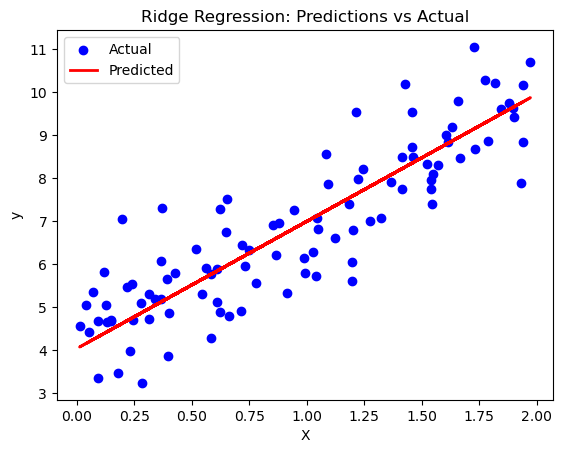

In [8]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

ridge_model = Ridge(learning_rate=0.01, max_iter=1000, l2_regularization=0.0001)


ridge_model.fit(X, y)
y_pred = ridge_model.predict(X)  

print(f"Final training loss: {ridge_model.loss[-1]:.4f}")
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Predictions vs Actual")
plt.legend()
plt.show()